# **TUGAS 4 - CLASSIFICATION TREE**

**Kelompok 11 - Statistika 2023A**


Anggota Kelompok :
- Nisrina Alissy (1314623008)
- Jessica Aurelia P. (1314623031)

Input data

In [ ]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#input data
link = "https://raw.githubusercontent.com/alissysays/SMT5_NA/refs/heads/main/RAW%20DATA/car_evaluation.csv"
df = pd.read_csv(link)
df.head()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [ ]:
df.columns

Index(['buying', 'biaya perawatan mobil', 'juml pintu mobil', 'jumlah person',
       'ukuran bagasi mobil', 'keamanan', 'class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   buying                 1728 non-null   object
 1   biaya perawatan mobil  1728 non-null   object
 2   juml pintu mobil       1728 non-null   object
 3   jumlah person          1728 non-null   object
 4   ukuran bagasi mobil    1728 non-null   object
 5   keamanan               1728 non-null   object
 6   class                  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Mengecek missing value
df.isna().sum()

,0
buying,0
biaya perawatan mobil,0
juml pintu mobil,0
jumlah person,0
ukuran bagasi mobil,0
keamanan,0
class,0


In [ ]:
#Cek apakah terdapat duplikat data
df.duplicated().any()

np.False_

In [ ]:
#ringkasan statistik
df.describe()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
#checking for rare category
for col in df.columns:
    print(f"\n=== {col.upper()} ===")
    print(df[col].value_counts())



=== BUYING ===
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

=== BIAYA PERAWATAN MOBIL ===
biaya perawatan mobil
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

=== JUML PINTU MOBIL ===
juml pintu mobil
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

=== JUMLAH PERSON ===
jumlah person
2       576
4       576
more    576
Name: count, dtype: int64

=== UKURAN BAGASI MOBIL ===
ukuran bagasi mobil
small    576
med      576
big      576
Name: count, dtype: int64

=== KEAMANAN ===
keamanan
low     576
med     576
high    576
Name: count, dtype: int64

=== CLASS ===
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


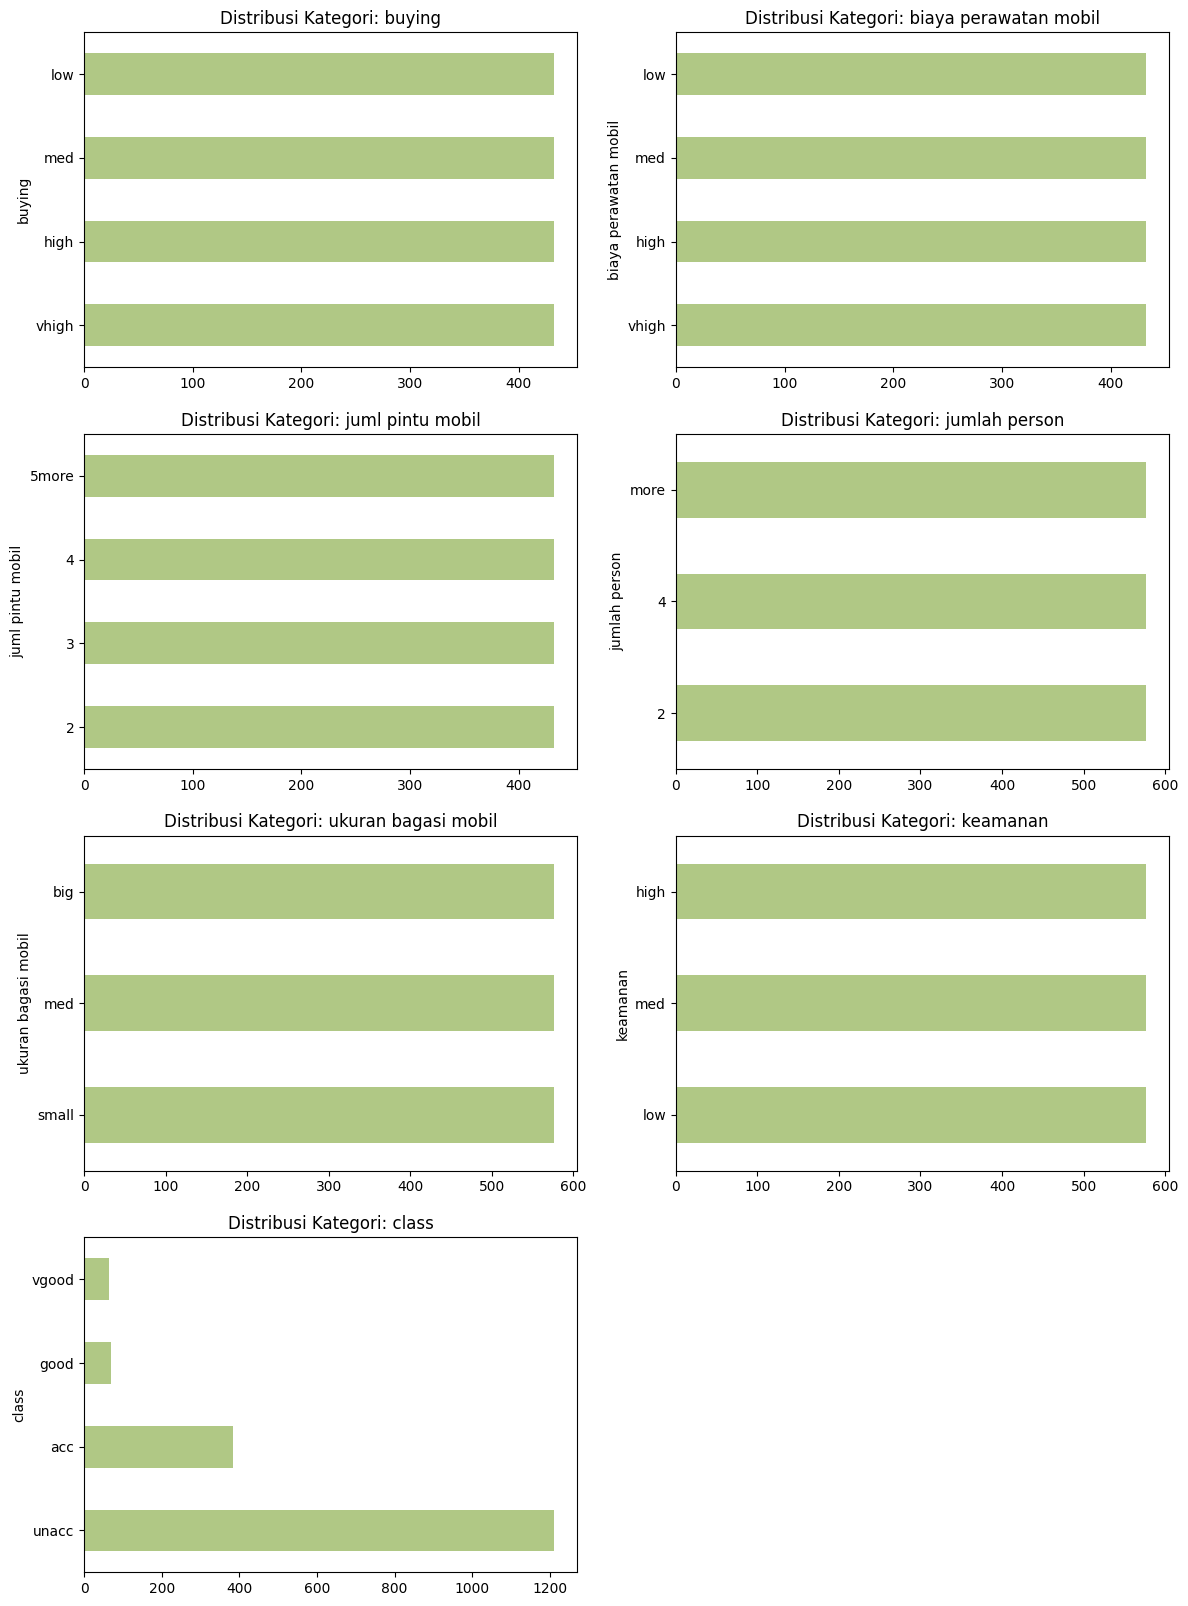

In [ ]:
#Bar Chart Horizontal for checking rare category
plt.figure(figsize=(14, 20))

for i, col in enumerate(df.columns):
    plt.subplot(4, 2, i+1)
    df[col].value_counts().plot(kind='barh', color='#b0c885')
    plt.title(f"Distribusi Kategori: {col}")


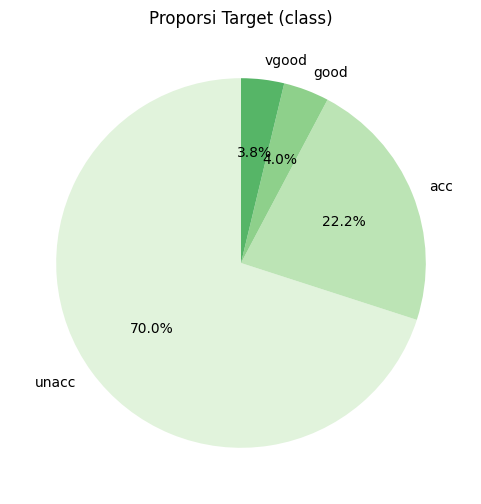

In [ ]:
#pie chart just for target
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Greens")
)
plt.ylabel('')
plt.title("Proporsi Target (class)")
plt.show()


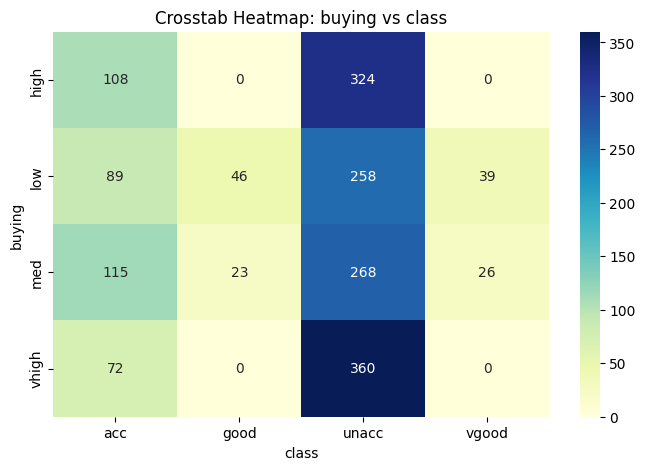

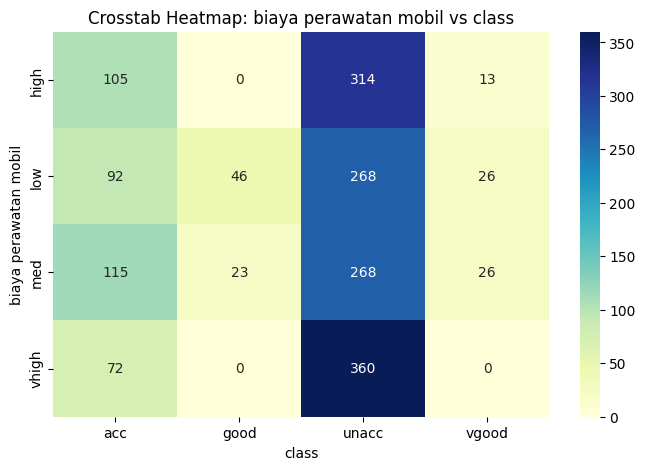

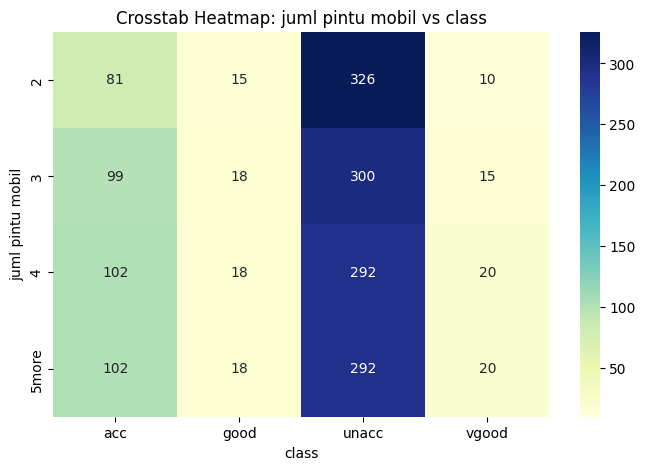

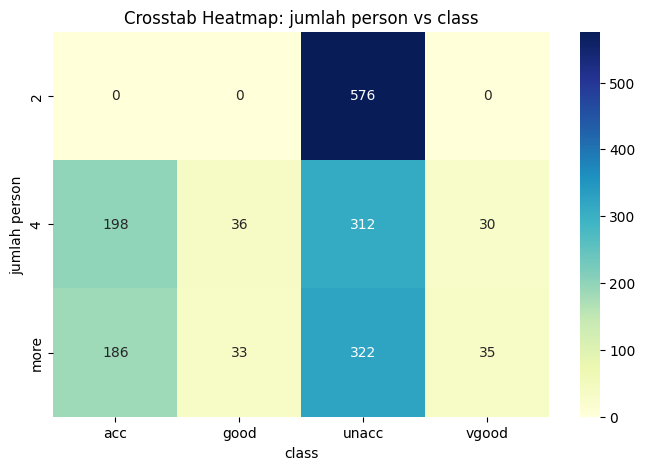

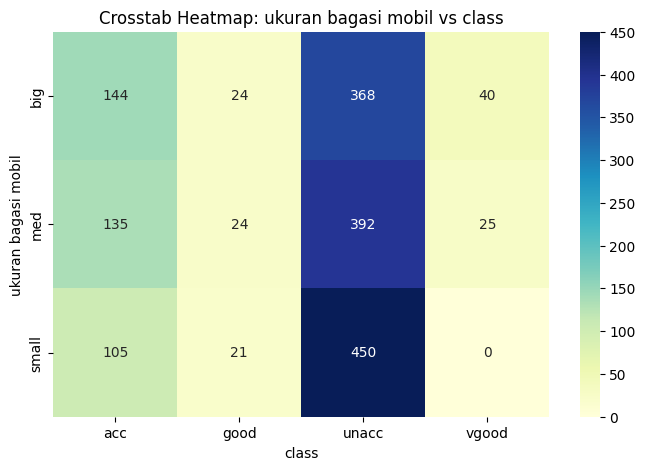

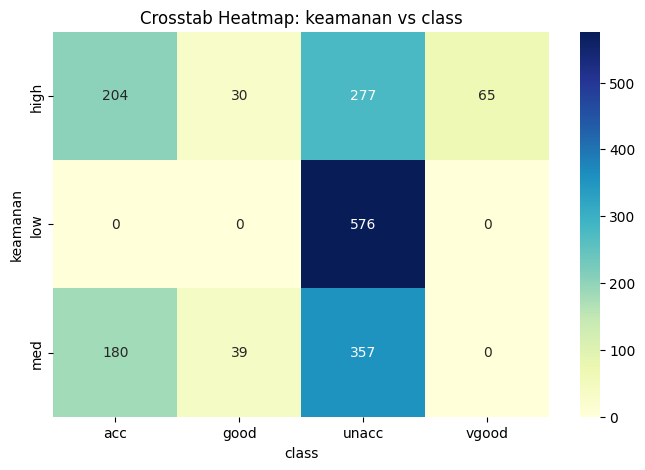

In [ ]:
#making a crosstab heatmap

target = "class"

for col in df.columns:
    if col == target:
        continue

    ct = pd.crosstab(df[col], df[target])

    plt.figure(figsize=(8, 5))
    sns.heatmap(ct, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Crosstab Heatmap: {col} vs {target}")
    plt.ylabel(col)
    plt.xlabel(target)
    plt.show()

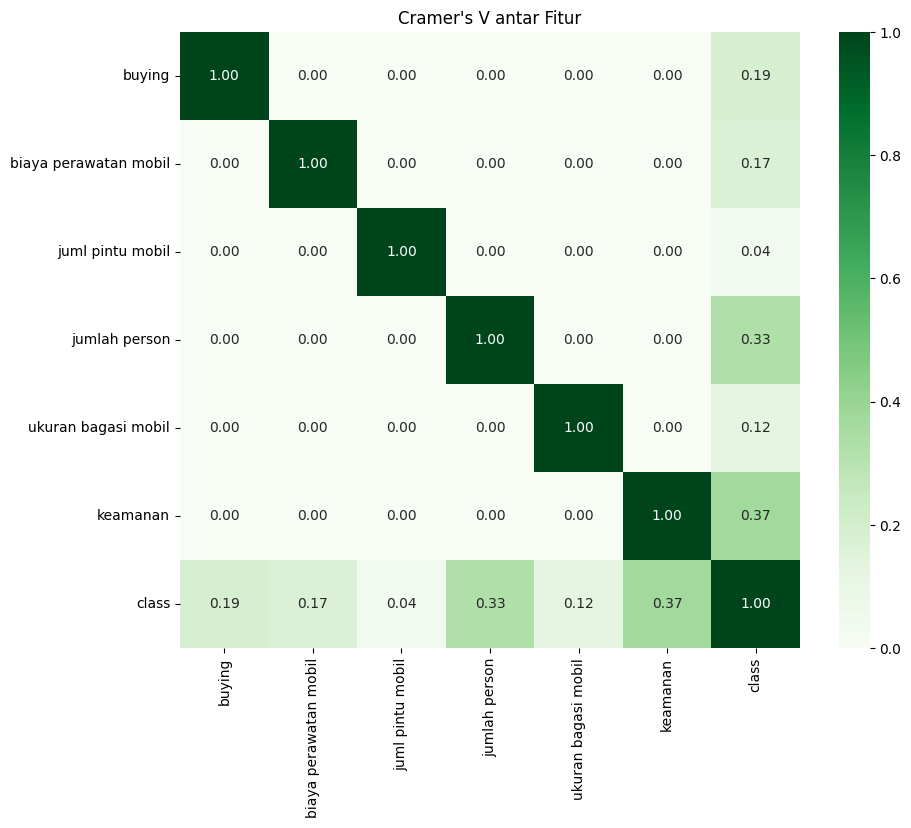

In [ ]:
#Chi-square + Cramer’s V antar fitur (Heatmap)
from scipy.stats import chi2_contingency
x = df.drop(['class'], axis=1)
y = df['class']
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    r, k = ct.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cols = df.columns
cramers_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))),
                              index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Cramer's V antar Fitur")
plt.show()


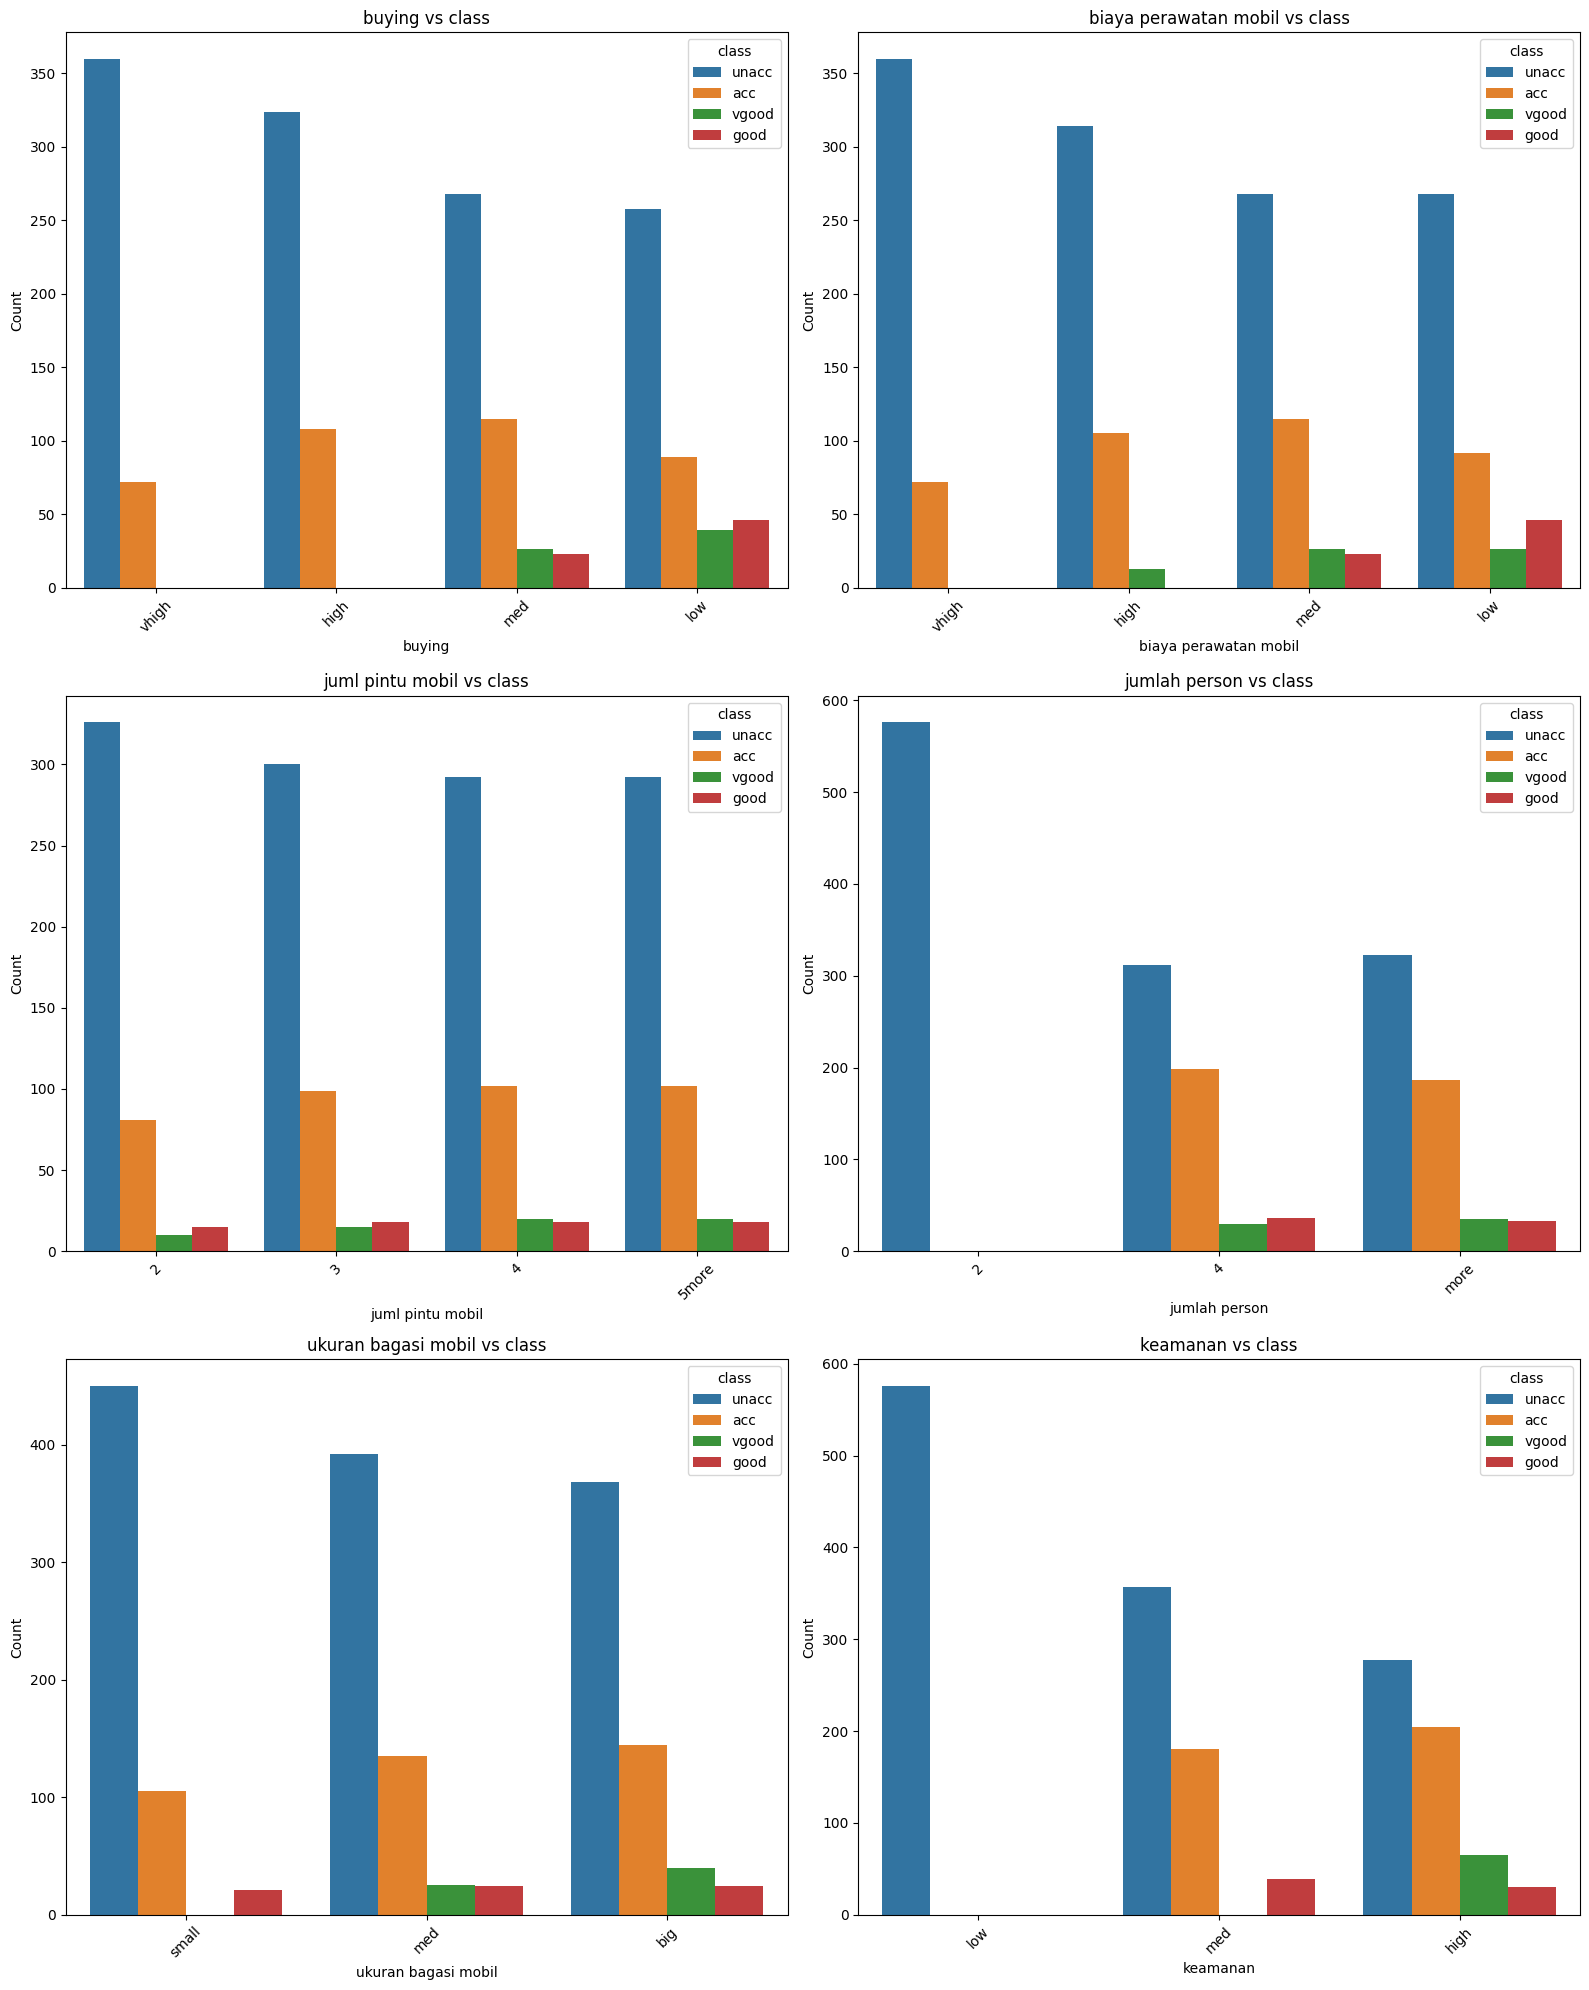

In [ ]:
#bivariate countplot

target = 'class'
features = [col for col in df.columns if col != target]

plt.figure(figsize=(16, 20))

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

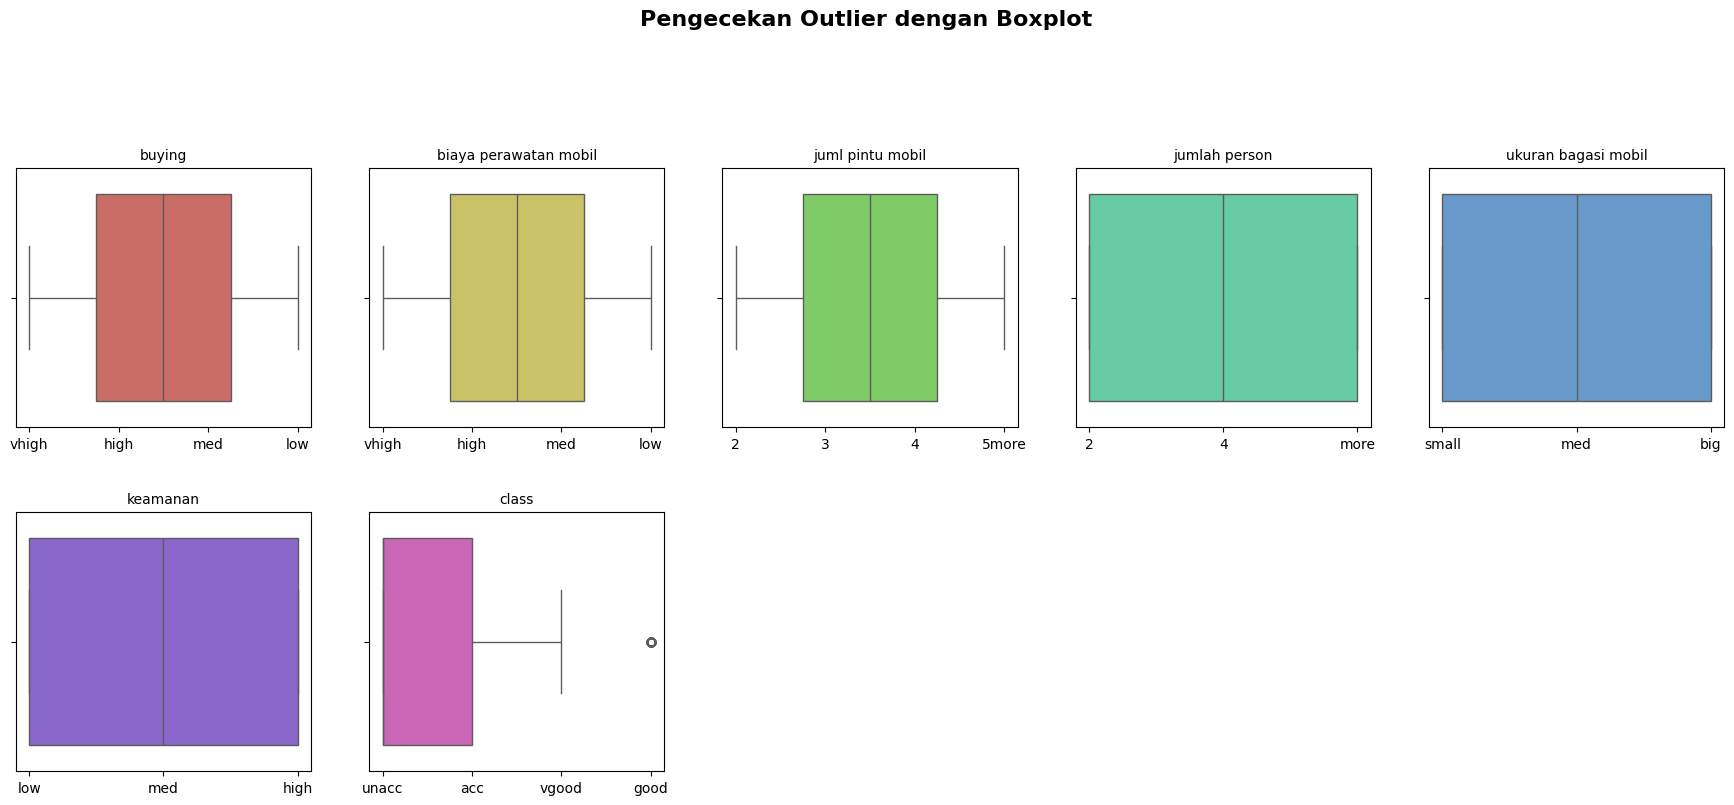

In [ ]:
#cek outlier
# Boxplot untuk mengecek outlier (dengan data awal)
kolom_numerik = df.describe().columns[:7]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=df[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()


=== Proporsi class berdasarkan kategori: buying ===

class     acc   good  unacc  vgood
buying                            
high    25.00   0.00  75.00   0.00
low     20.60  10.65  59.72   9.03
med     26.62   5.32  62.04   6.02
vhigh   16.67   0.00  83.33   0.00

=== Proporsi class berdasarkan kategori: biaya perawatan mobil ===

class                    acc   good  unacc  vgood
biaya perawatan mobil                            
high                   24.31   0.00  72.69   3.01
low                    21.30  10.65  62.04   6.02
med                    26.62   5.32  62.04   6.02
vhigh                  16.67   0.00  83.33   0.00

=== Proporsi class berdasarkan kategori: juml pintu mobil ===

class               acc  good  unacc  vgood
juml pintu mobil                           
2                 18.75  3.47  75.46   2.31
3                 22.92  4.17  69.44   3.47
4                 23.61  4.17  67.59   4.63
5more             23.61  4.17  67.59   4.63

=== Proporsi class berdasarkan kategor

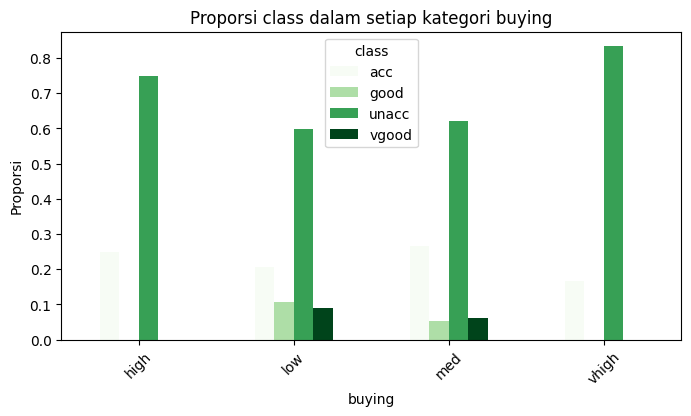

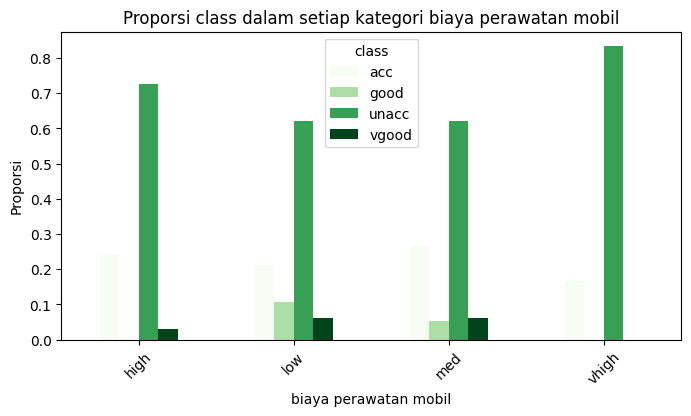

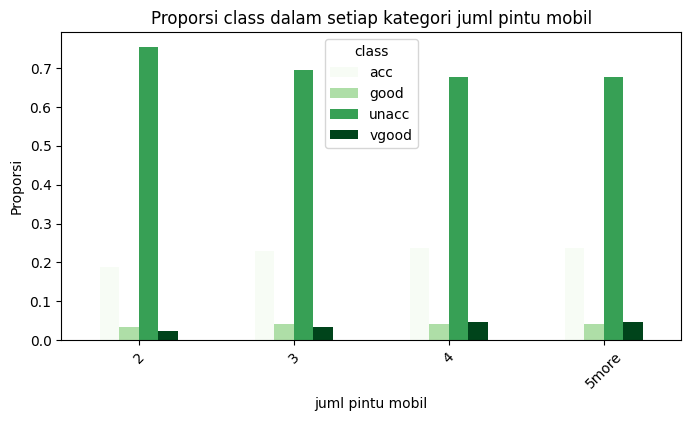

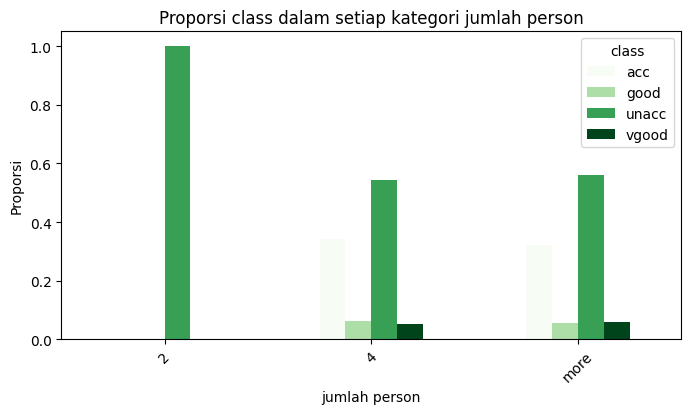

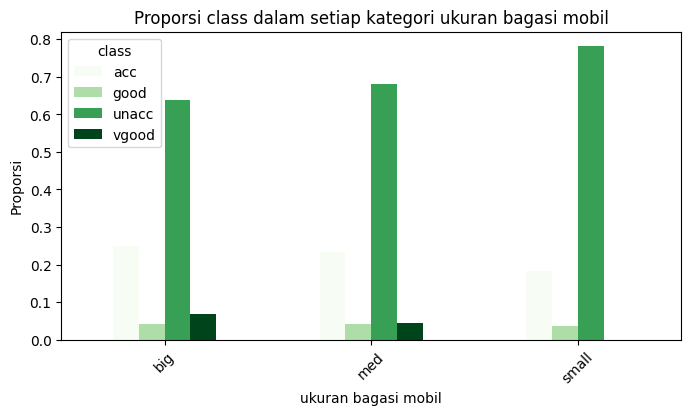

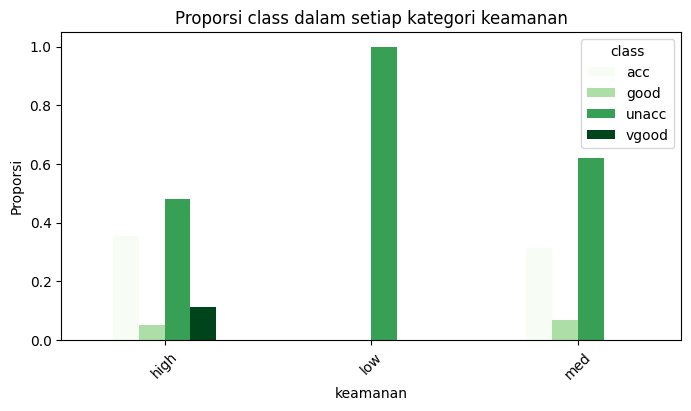

In [ ]:
#proportion target per category
#tambahan aje
for col in features:
    print(f"\n=== Proporsi class berdasarkan kategori: {col} ===\n")
    prop = (pd.crosstab(df[col], df[target], normalize='index') * 100).round(2)
    print(prop)
#visualization
for col in features:
     prop = pd.crosstab(df[col], df[target], normalize='index')
     prop.plot(kind='bar', figsize=(8, 4), colormap="Greens")
     plt.title(f"Proporsi {target} dalam setiap kategori {col}")
     plt.ylabel("Proporsi")
     plt.legend(title=target)
     plt.xticks(rotation=45)
     plt.show()

# Preprocessing data

In [ ]:
#membagi kelas target dan fitur
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
X.head()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [ ]:
#split data into train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("\n Hasil Pembagian Data (70:30):")
print(f"X_train (Data Latih Fitur): {X_train.shape}")
print(f"X_test (Data Uji Fitur): {X_test.shape}")
print(f"y_train (Data Latih Target): {y_train.shape}")
print(f"y_test (Data Uji Target): {y_test.shape}")


 Hasil Pembagian Data (70:30):
X_train (Data Latih Fitur): (1209, 6)
X_test (Data Uji Fitur): (519, 6)
y_train (Data Latih Target): (1209,)
y_test (Data Uji Target): (519,)


In [ ]:
X_train.dtypes

,0
buying,object
biaya perawatan mobil,object
juml pintu mobil,object
jumlah person,object
ukuran bagasi mobil,object
keamanan,object


In [ ]:
X_train.head()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [ ]:
!pip install category-encoders

In [ ]:
#encode variables
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'biaya perawatan mobil', 'juml pintu mobil', 'jumlah person',
       'ukuran bagasi mobil', 'keamanan'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [ ]:
X_test.head()

,buying,biaya perawatan mobil,juml pintu mobil,jumlah person,ukuran bagasi mobil,keamanan
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


Menerapkan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("1. Penerapan SMOTE")

# Inisialisasi SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)

# Lakukan Resampling pada Data Training SAJA
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(f"   Data Training Asli: {len(y_train)} sampel")
print(f"   Data Training Setelah SMOTE: {len(y_train_smote)} sampel")

1. Penerapan SMOTE
   Data Training Asli: 1209 sampel
   Data Training Setelah SMOTE: 3408 sampel


# **Decision tree classifier**

In [ ]:
# import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Optimasi Hyperparameter pada data SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

print("Optimasi Hyperparameter dengan Grid Search")

# Definisikan Metrik (F1-score Weighted)
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Definisikan Ruang Pencarian (param_grid)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'random_state': [42]
}


Optimasi Hyperparameter dengan Grid Search


In [ ]:
dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring=f1_weighted_scorer,
    cv=5,
    n_jobs=-1
)

In [ ]:
# Latih Grid Search pada DATA SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Dapatkan Model Terbaik
best_dt_model = grid_search.best_estimator_
print(f"   Hyperparameter Terbaik: {grid_search.best_params_}")

   Hyperparameter Terbaik: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'random_state': 42}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
y_pred_final = best_dt_model.predict(X_test)
y_score_final = best_dt_model.predict_proba(X_test)

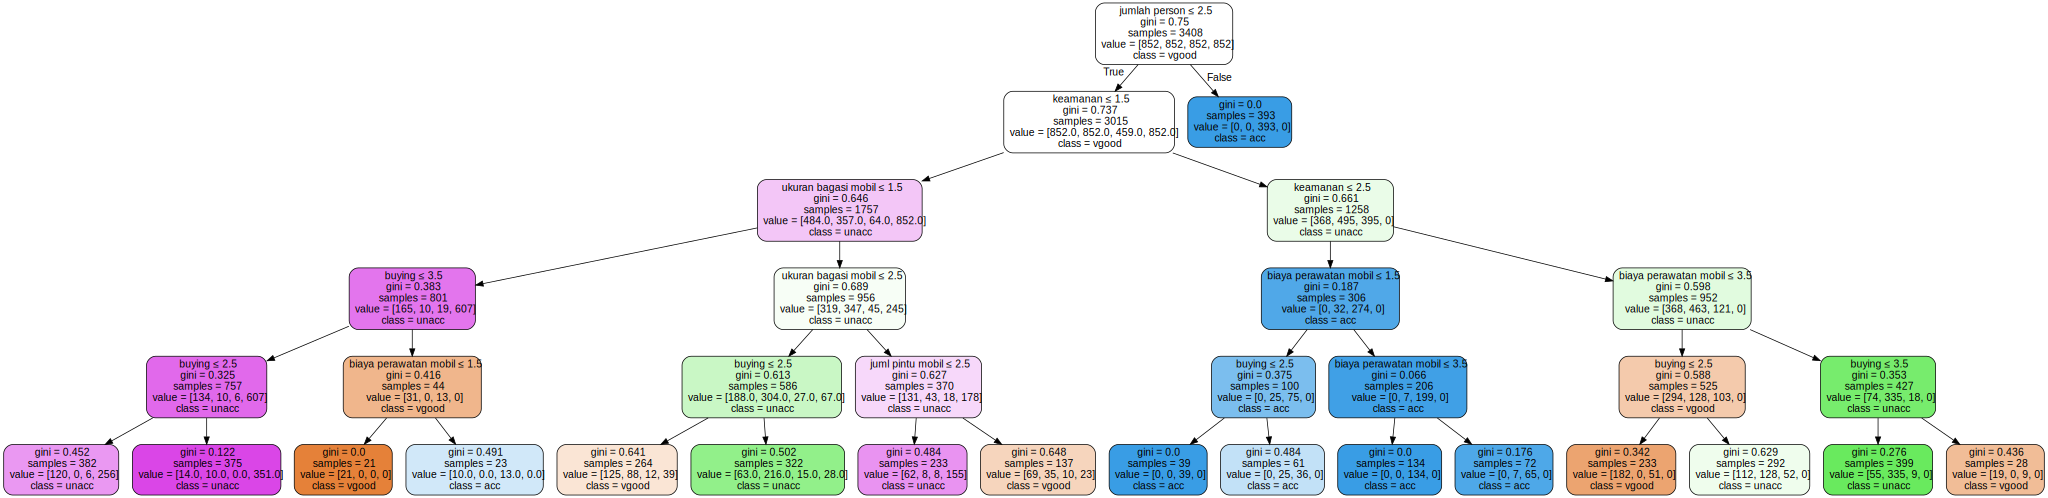

In [ ]:
#Visualisasi dari decision tree
import graphviz
dot_data = tree.export_graphviz(best_dt_model, out_file=None,
                              feature_names=X_train_smote.columns,
                              class_names=y_train_smote,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Dengan Data Asli Tanpa SMOTE

In [ ]:
# Menginisiasi dengan kriteria gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#Prediksi pada data testing dengan kriteria gini index
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#Membandingkan akurasi dari train set dan test set untuk cek overfitting
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [ ]:
#Cek Underfitting an Overfitting dari skor Akurasi
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7767
Test set score: 0.7592


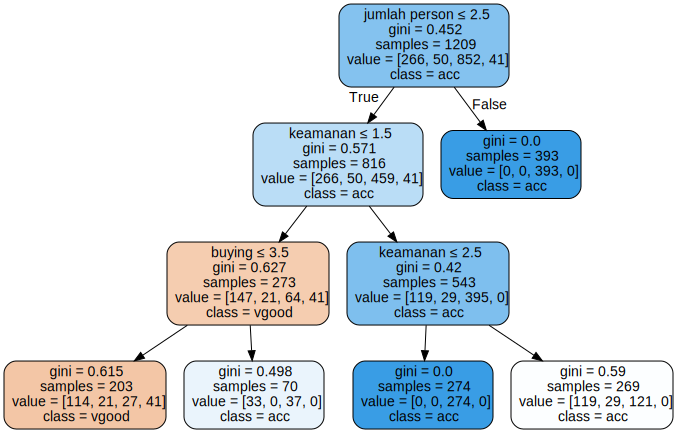

In [ ]:
#Visualisasi dari decision tree
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

# **2.Classification tree (kriteria entrophy)**

In [ ]:
# Inisiasi dengan kriteria entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
#Prediksi data testing dengan kriteria entropy
y_pred_en = clf_en.predict(X_test)

In [55]:
#Cek akurasi skor dengan criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7592


In [ ]:
#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

In [56]:
#Cek underfitting dan overfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7767
Test set score: 0.7592


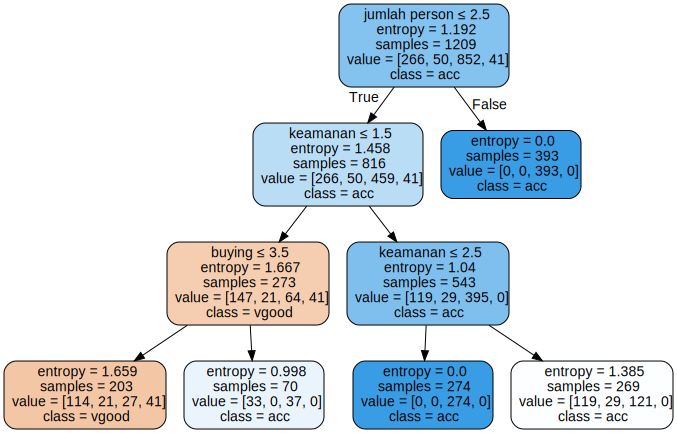

In [57]:
#Visualisasi dari decision tree
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

# **Evaluasi Model**

# **Classification Tree (Gini Index)**

**Dengan Data Asli Tanpa SMOTE**

In [58]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


In [59]:
#Classification report yang menampilkan precission, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.52      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.98      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.34      0.33       519
weighted avg       0.67      0.76      0.71       519



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


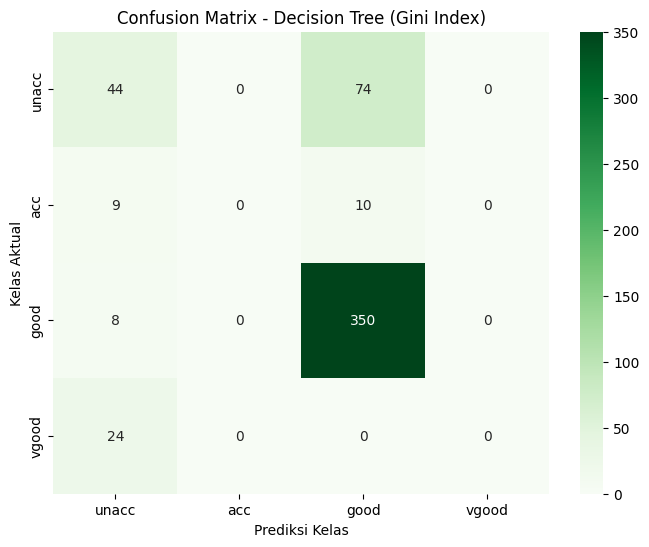

In [60]:
#Membuat heatmap confussion matrix
#Kelas
kelas = ['unacc', 'acc', 'good', 'vgood']

# --- Membuat Heatmap ---
plt.figure(figsize=(8, 6))

# 1. Menggunakan sns.heatmap
sns.heatmap(
    cm,
    annot=True,        # Menampilkan nilai numerik di setiap sel
    fmt='d',           # Memastikan angka ditampilkan sebagai integer (bukan notasi ilmiah)
    cmap='Greens',
    xticklabels=kelas, # Label sumbu X (Prediksi)
    yticklabels=kelas  # Label sumbu Y (Aktual)
)

# 2. Menambahkan Label dan Judul
plt.title('Confusion Matrix - Decision Tree (Gini Index)')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.show()

Dengan SMOTE dan Optimasi Hyperparameter

In [61]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm_final= confusion_matrix(y_test, y_pred_final)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

         acc       0.56      0.37      0.45       118
        good       0.15      0.68      0.24        19
       unacc       0.99      0.83      0.90       358
       vgood       0.33      0.75      0.46        24

    accuracy                           0.71       519
   macro avg       0.51      0.66      0.51       519
weighted avg       0.83      0.71      0.75       519



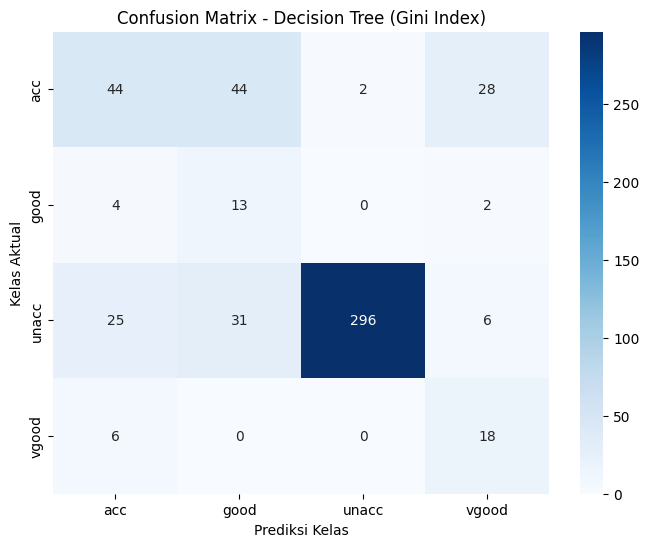

In [63]:
#Membuat heatmap confussion matrix
#Kelas
kelas = ['unacc', 'acc', 'good', 'vgood']

# Membuat Heatmap
plt.figure(figsize=(8, 6))

#nama kelas
kelas_final = best_dt_model.classes_
# 1. Menggunakan sns.heatmap
sns.heatmap(
    cm_final,
    annot=True,        # Menampilkan nilai numerik di setiap sel
    fmt='d',           # Memastikan angka ditampilkan sebagai integer (bukan notasi ilmiah)
    cmap='Blues',
    xticklabels=kelas_final, # Label sumbu X (Prediksi)
    yticklabels=kelas_final  # Label sumbu Y (Aktual)
)

# 2. Menambahkan Label dan Judul
plt.title('Confusion Matrix - Decision Tree (Gini Index)')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.show()

# **Classification Tree (Entropy)**

In [64]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


In [66]:
#Classification report yang menampilkan precission, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.52      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.98      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.34      0.33       519
weighted avg       0.67      0.76      0.71       519



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


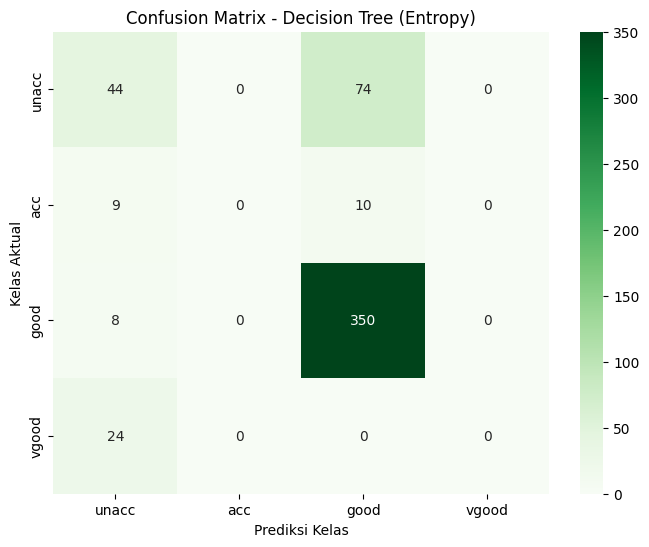

In [67]:
#Membuat heatmap confussion matrix
#Kelas
kelas = ['unacc', 'acc', 'good', 'vgood']

# Membuat Heatmap
plt.figure(figsize=(8, 6))

# 1. Menggunakan sns.heatmap
sns.heatmap(
    cm,
    annot=True,        # Menampilkan nilai numerik di setiap sel
    fmt='d',           # Memastikan angka ditampilkan sebagai integer (bukan notasi ilmiah)
    cmap='Greens',
    xticklabels=kelas, # Label sumbu X (Prediksi)
    yticklabels=kelas  # Label sumbu Y (Aktual)
)

# 2. Menambahkan Label dan Judul
plt.title('Confusion Matrix - Decision Tree (Entropy)')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.show()